In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing dataset
dataset = pd.read_csv('cleveland.csv')

In [3]:
# Summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


#### Summary of dataframe:
- 14 columns
- 303 rows
- 13 columns have dtype = float, 1 column is of dtype = int, i.e all columns are numerical
- Column ca contains 4 NaN entries and column thal contains 2 NaN entries

In [4]:
# dropping rows that contain NaN entries (6 rows will be dropped)
dataset.dropna(inplace = True)

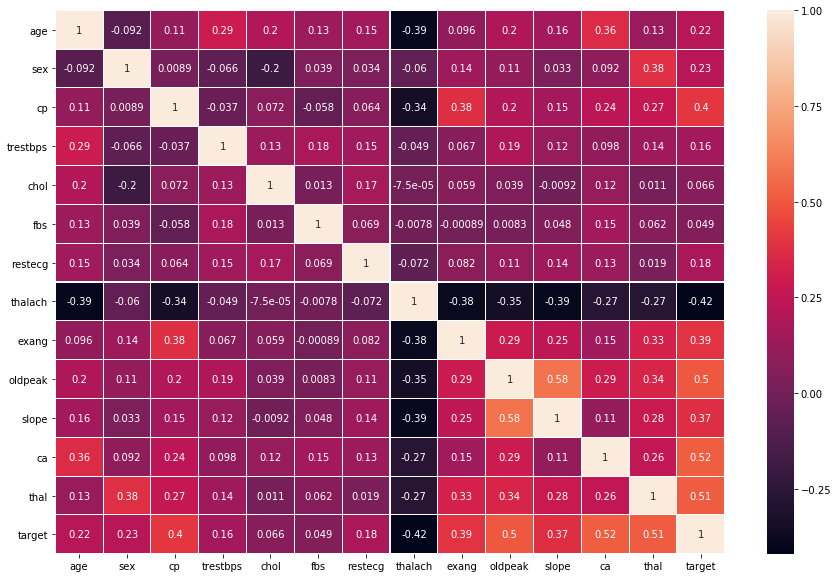

In [5]:
# Plotting the heatmap
mpl.rcParams['figure.figsize'] = 15, 10
sns.heatmap(dataset.corr(), linecolor = 'white', linewidths = 0.01, 
            annot = True)

In [6]:
# Correlation matrix
crel_mat = dataset.corr()
crel_mat['target'].sort_values(ascending = False)

target      1.000000
ca          0.521178
thal        0.513377
oldpeak     0.501461
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: target, dtype: float64

#### Heatmap and correlation matrix indicates that columns:
- ca (number of major vessels colored by fluoroscopy)
- thal (thalassemia)
- oldpeak (Stress Test depression induced by exercise relative to rest)
- cp (chest pain)

are relatively highly corelated with the target column(prediction of heart disease)

In [7]:
# Displaying first 5 rows of the dataframe
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0) of a heart disease.
So we will now map the values from target column as:
- 0 = Absence of heart disease
- 1, 2, 3, 4 as 1 = Presence of heart disease

In [8]:
# Mapping target values

dataset['target'] = dataset['target'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [9]:
# Categorizing age into new column called age_category with values as 'Young Adult', 'Middle Aged', 'Senior', 'Super Senior'

age_bins = [0, 35, 55, 75, 100]
age_labels = ['Young Adult', 'Middle Aged', 'Senior', 'Super Senior']

dataset['age_category'] = pd.cut(x = dataset['age'], bins = age_bins, labels = age_labels)

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Presence of heart disease\n')

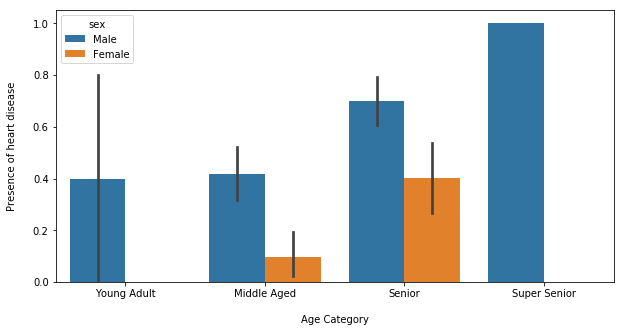

In [10]:
# Setting figure size
mpl.rcParams['figure.figsize'] = 10, 5

# Plotting Age category vs Heart disease
sns.barplot(data = dataset, x = 'age_category', y = 'target', hue = dataset['sex'].map({0: 'Female', 1: 'Male'}))
plt.xlabel('\nAge Category')
plt.ylabel('Presence of heart disease\n')

Text(0, 0.5, 'Presence of heart disease\n')

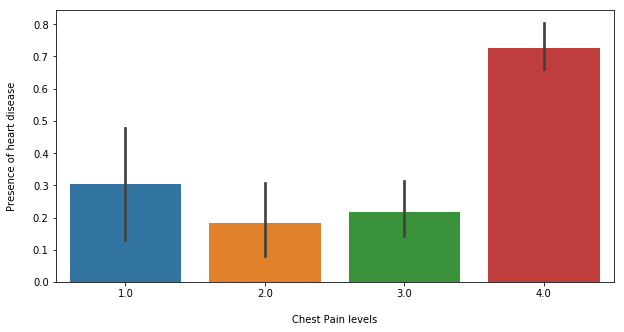

In [11]:
# Plotting Chest pain vs Heart disease

sns.barplot(data = dataset, x = 'cp', y = 'target')
plt.xlabel('\nChest Pain levels')
plt.ylabel('Presence of heart disease\n')

Text(0, 0.5, 'Presence of heart disease\n')

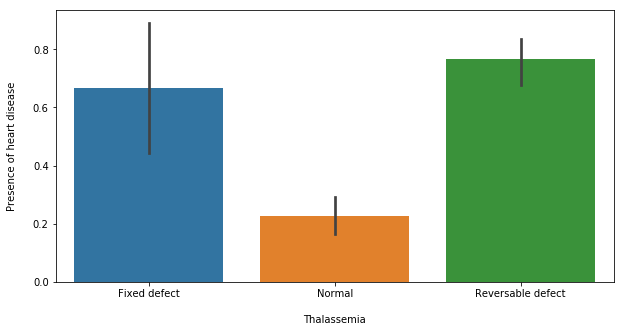

In [12]:
# Plotting Thalassemia vs Heart disease

sns.barplot(data = dataset, x = dataset['thal'].map({3 : 'Normal', 6 : 'Fixed defect', 7 : 'Reversable defect'}),
                            y = 'target')
plt.xlabel('\nThalassemia')
plt.ylabel('Presence of heart disease\n')

Text(0, 0.5, 'Presence of heart disease\n')

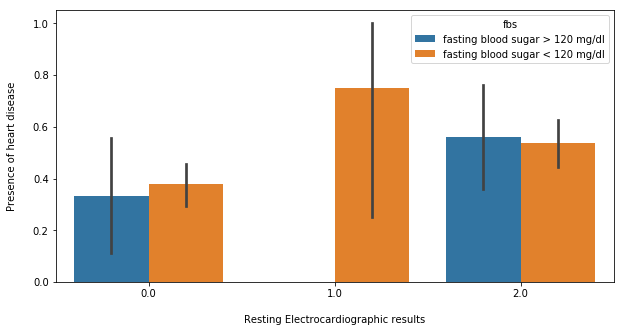

In [13]:
# Plotting Resting Electrocardiographic results vs Heart disease
sns.barplot(data = dataset, x = 'restecg', y = 'target', 
                hue = dataset['fbs'].map({0: 'fasting blood sugar < 120 mg/dl', 1: 'fasting blood sugar > 120 mg/dl'}))

plt.xlabel('\nResting Electrocardiographic results')
plt.ylabel('Presence of heart disease\n')

In [14]:
# Defining independent and dependent variables

X = dataset.drop(columns = ['target','age_category'], axis = 1)
y = dataset['target']

In [15]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X.iloc[:] = sc_X.fit_transform(X.iloc[:])

In [16]:
# Splitting data into training and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 1)

In [17]:
# Importing classes required for creating classification models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Importing methods to evaluate classification models
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [18]:
# Function to print accuracy and f1 score

def get_accuracy_f1_score(true_predictions, classifier_predictions, classifier_name):
    
    cm = confusion_matrix(true_predictions, classifier_predictions)
    print("=" * 40)
    print(classifier_name)
    print("-" * 40)
    
    print(f"Accuracy = {accuracy_score(true_predictions, classifier_predictions) * 100 :.3f}%")
    print(f"F1 Score = {f1_score(true_predictions, classifier_predictions) :.3f}")
    
    print("=" * 40)
    print()

In [19]:
# Function to train the classification models and predict the validation set's results

def train_predict_on_different_classifiers(X_train, X_val, y_train, y_val):
    classifier_svc = SVC(random_state = 1)
    classifier_svc.fit(X_train, y_train)
    y_pred_svc = classifier_svc.predict(X_val)
    get_accuracy_f1_score(y_val, y_pred_svc, "Support Vector Classifier")
    
    classifier_nb = GaussianNB()
    classifier_nb.fit(X_train, y_train)
    y_pred_nb = classifier_nb.predict(X_val)
    get_accuracy_f1_score(y_val, y_pred_nb, "Naive Bayes Classifier")

    classifier_rf = RandomForestClassifier(random_state = 1)
    classifier_rf.fit(X_train, y_train)
    y_pred_rf = classifier_rf.predict(X_val)
    get_accuracy_f1_score(y_val, y_pred_rf, "Random Forest Classifier")
    

In [20]:
train_predict_on_different_classifiers(X_train, X_val, y_train, y_val)

Support Vector Classifier
----------------------------------------
Accuracy = 86.667%
F1 Score = 0.867

Naive Bayes Classifier
----------------------------------------
Accuracy = 88.333%
F1 Score = 0.881

Random Forest Classifier
----------------------------------------
Accuracy = 81.667%
F1 Score = 0.807



c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
